In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import scipy.stats
import copy
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import random_projection
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools

In [2]:
# Import data
location = '/Users/ndeveaux/Documents/AshkenazimTrio'

In [5]:
files = {'s': 'HG002run1_S1_10000.vcf', 
         'f': 'HG003Run01_S1_10000.vcf',
         'm': 'HG004Run01_S1_10000.vcf'}
         

These small files were created from the full >1GB vcf files with the following command:
head -10000 HG004Run01_S1.vcf | grep -v "##" > HG004Run01_S1_10000.vcf

In [19]:
vcfs = {}

In [21]:
for f in files:
    vcfs[f] = pd.read_csv(os.path.join(location, files[f]), sep='\t')

In [31]:
# filter VCFs to shared variants
shared_rsids = set.intersection(*[set(vcfs[x][vcfs[x]['ID'] != '.']['ID']) for x in vcfs])

In [46]:
merged_parents

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG004Run01
53,chr1,10177,rs201752861,A,C,108.29,TruthSensitivityTranche99.90to100.00;LowMQ;LowQD,AC=1;AF=0.50;AN=2;BaseQRankSum=0.092;DP=63;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:39,19:61:99:99:17:138,0,188:0.328"
57,chr1,10291,rs145427775,C,T,32.21,TruthSensitivityTranche99.90to100.00;LowMQ;LowQD,AC=1;AF=0.50;AN=2;BaseQRankSum=0.103;DP=92;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:75,13:92:62.20:32:19:62,0,342:0.148"
60,chr1,10327,rs112750067,T,C,141.37,TruthSensitivityTranche99.90to100.00;LowQD,AC=1;AF=0.50;AN=2;BaseQRankSum=1.524;DP=79;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:48,27:76:99:99:20:171,0,230:0.360"
65,chr1,10492,rs55998931,C,T,574.95,TruthSensitivityTranche99.90to100.00,AC=1;AF=0.50;AN=2;BaseQRankSum=-0.046;DP=56;De...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:30,26:56:99:99:30:605,0,724:0.464"
73,chr1,10927,rs10218527,A,G,82.07,TruthSensitivityTranche99.90to100.00;LowGQX;LowMQ,AC=1;AF=0.50;AN=2;BaseQRankSum=0.731;DP=35;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:25,9:34:18.40:18:13:112,0,18:0.265"
88,chr1,13896,rs201696125,C,A,276.63,TruthSensitivityTranche99.90to100.00;LowMQ,AC=1;AF=0.50;AN=2;BaseQRankSum=1.146;DP=96;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:75,21:96:99:99:18:307,0,839:0.219"
89,chr1,13957,rs201747181,TC,T,438.76,PASS,AC=1;AF=0.02;AN=2;BaseQRankSum=-0.324;DP=45;FS...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:20,25:25:99:99:20:478,0,119:0.556"
94,chr1,14907,rs79585140,A,G,2080.92,TruthSensitivityTranche99.90to100.00,AC=1;AF=0.50;AN=2;BaseQRankSum=0.855;DP=158;De...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:60,98:158:99:99:30:2111,0,896:0.620"
95,chr1,14930,rs75454623,A,G,2559.86,TruthSensitivityTranche99.90to100.00,AC=1;AF=0.50;AN=2;BaseQRankSum=0.139;DP=138;De...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:41,97:138:99:99:33:2590,0,784:0.703"
96,chr1,15118,rs71252250,A,G,544.00,TruthSensitivityTranche99.90to100.00,AC=1;AF=0.50;AN=2;BaseQRankSum=2.029;DP=90;Del...,GT:AD:DP:GQ:GQX:MQ:PL:VF,"0/1:39,51:90:99:99:21:574,0,145:0.567"


In [76]:
merged_parents = vcfs['m'][vcfs['m']['ID'].isin(list(shared_rsids))]

In [77]:
merged_parents = merged_parents.merge(vcfs['f'][['ID', 'REF', 'ALT', 'HG003Run01']], left_on='ID', right_on='ID', how='inner')

In [84]:
len(merged_parents)

3691

In [107]:
# Parent VCfs have different Alt Alleles
f_key = 'HG003Run01'
m_key = 'HG004Run01'
distances = {}
diffs = []
distances[(m_key, f_key)] = []
for (idx, row) in merged_parents.iterrows():
    # only continue if we haven't reached the end
    # if (idx + window_size) < len(merged_parents):
        diffs.append(calculate_differences(row[f_key], row[m_key], row['ALT_x'], row['ALT_y']))
        if row['REF_x'] != row['REF_y'] or row['ALT_x'] != row['ALT_y']:
            print 'ERROR'
            print diffs[idx]

ERROR
3
ERROR
1
ERROR
3
ERROR
3
ERROR
3
ERROR
1
ERROR
3
ERROR
3
ERROR
3
ERROR
3
ERROR
1
ERROR
2
ERROR
2
ERROR
3
ERROR
3
ERROR
2
ERROR
3
ERROR
3
ERROR
1
ERROR
2
ERROR
3
ERROR
3
ERROR
1
ERROR
3
ERROR
3
ERROR
3
ERROR
1
ERROR
1
ERROR
1
ERROR
1
ERROR
1
ERROR
1
ERROR
3
ERROR
1
ERROR
3


In [94]:
spread_diffs = np.sum(diffs[0:window_size])

In [110]:
window_sizes = [10, 50, 100, 200, 500, 1000]

In [111]:
spread_diffs = {}
for window_size in window_sizes:
    spread_diff = []
    for index in range(len(diffs) - window_size):
        spread_diff.append(np.sum(diffs[index:index + window_size]))
    spread_diffs[window_size] = spread_diff

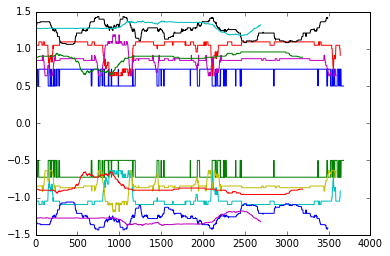

In [122]:
for window_size in window_sizes:
    sp = spread_diffs[window_size]
    mean_sp = np.mean(sp)
    x = [((float(sp[i]) + mean_sp)/(2*np.mean(sp))) for i in sp]
    # y = [(-(float(sp[i]) + mean_sp)/(2*np.mean(sp))) for i in sp]
    # y = [0 for x in len(sp)]
    plt.plot(range(len(sp)), x)
    plt.plot(range(len(sp)), -np.array(x))


In [ ]:
calculate_differences(vcfs[x][index:window_size], vcfs[y][index:window_size])

In [106]:
def split_vcf_line(x):
    return x.split(':')[0].split('/')

def calculate_differences(a, b, alt_x, alt_y):
    a_numbers = [int(x) for x in split_vcf_line(a)]
    b_numbers = [int(x) for x in split_vcf_line(b)]
    if alt_x == alt_y:
        diff = np.abs(np.sum(a_numbers) - np.sum(b_numbers))
    else:
        diff = np.max([np.sum(a_numbers), np.sum(b_numbers)])
    return diff

In [123]:
data_file = '/Users/ndeveaux/Desktop/priors.tsv'

In [124]:
prior= pd.read_csv(data_file, sep='\t')

In [134]:
small_prior = prior.iloc[1:650, 1:650]

In [135]:
small_prior

,FBgn0086680,FBgn0004396,FBgn0004652,FBgn0004394,FBgn0001147,FBgn0001148,FBgn0011723,FBgn0000576,FBgn0010433,FBgn0010109,...,FBgn0038418,FBgn0001150,FBgn0026411,FBgn0000462,FBgn0054031,FBgn0002922,FBgn0022935,FBgn0052830,FBgn0015561,FBgn0000546
FBgn0014931,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,1,1,1,1,1,1
FBgn0014930,1,0,0,0,0,0,1,1,1,0,...,0,0,1,0,1,1,0,1,1,0
FBgn0264483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
FBgn0027562,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
FBgn0035031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
FBgn0027560,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
FBgn0027561,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
FBgn0027567,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
FBgn0027564,1,0,1,1,0,0,1,0,1,0,...,1,1,0,1,1,0,0,0,0,0
FBgn0027565,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


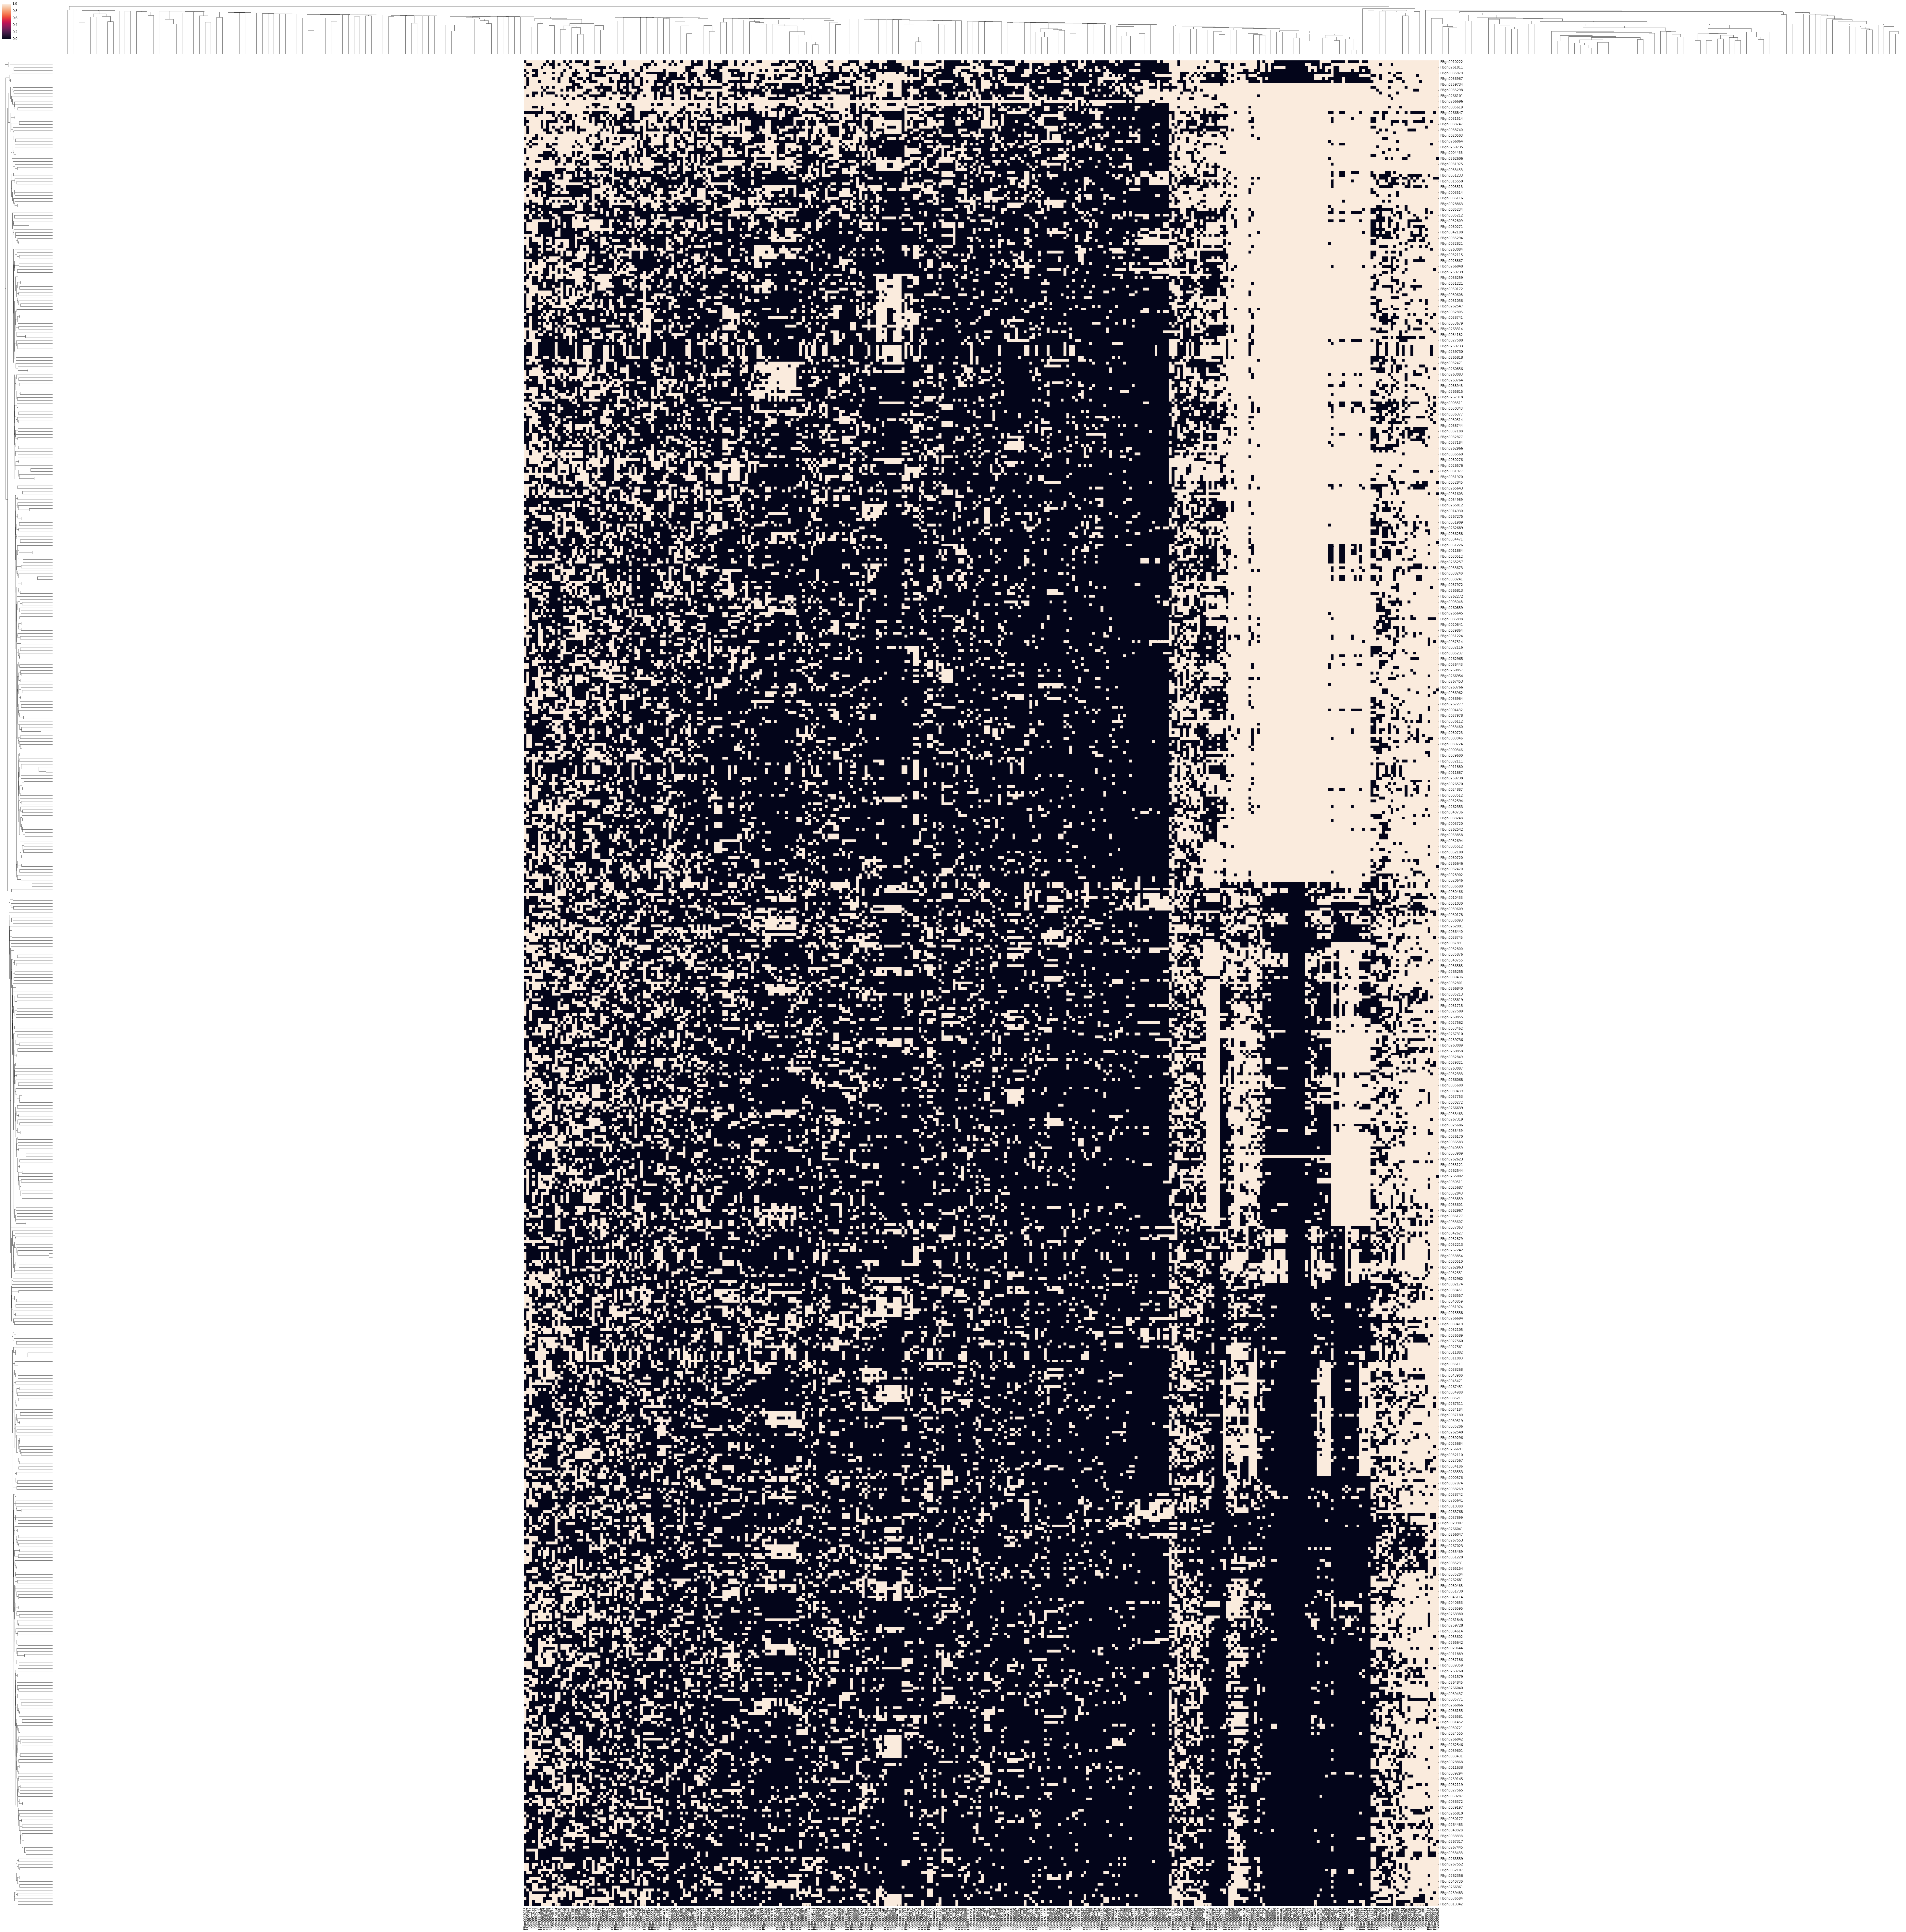

In [136]:
sns.clustermap(small_prior, robust=True, square=True,  figsize=(105, 105))

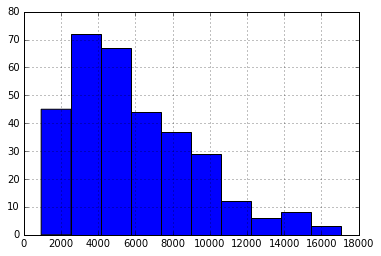

In [143]:
prior.sum(axis=0).hist()

In [139]:
prior.shape

(17302, 323)